In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data\SuperStore_Sales_Enhanced.csv')

In [4]:
df.head(5)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Profit,Returns,Payment Mode,ind1,ind2,Warehouse,Current_Stock,Reorder_Level,Lead_Time_Days
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,1,28.2668,NaN,Online,NaN,NaN,Warehouse_South,152,50,7
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,3,38.2668,NaN,Online,NaN,NaN,Warehouse_South,485,161,9
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,2,67.2742,NaN,Cards,NaN,NaN,Warehouse_South,398,132,2
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,2,28.6150,NaN,Online,NaN,NaN,Warehouse_West,320,106,9
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,2,-5.2640,NaN,Online,NaN,NaN,Warehouse_South,156,52,7


In [ ]:

print("Missing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)
print("\nDate columns look like:")
print(df[['Order Date', 'Ship Date']].head())


Missing values per column:
Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
Warehouse              0
Current_Stock          0
Reorder_Level          0
Lead_Time_Days         0
dtype: int64

Data types:
Row ID+O6G3A1:R6      int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Customer Name        object
Segment              object
Country              object
City                

In [ ]:

df_clean = df.copy()
df_clean = df_clean.rename(columns={'Row ID+O6G3A1:R6': 'Row ID'})


df_clean['Order_Date'] = pd.to_datetime(df_clean['Order Date'], format='mixed', dayfirst=False)
df_clean['Ship_Date'] = pd.to_datetime(df_clean['Ship Date'], format='mixed', dayfirst=False)


df_clean['Order_Date'] = df_clean['Order_Date'].dt.strftime('%d-%b-%Y')
df_clean['Ship_Date'] = df_clean['Ship_Date'].dt.strftime('%d-%b-%Y')


cols_to_drop = ['Returns', 'ind1', 'ind2', 'Payment Mode']
df_clean = df_clean.drop(columns=cols_to_drop)

# Fix numerics
df_clean['Sales'] = pd.to_numeric(df_clean['Sales'], errors='coerce')
df_clean['Quantity'] = pd.to_numeric(df_clean['Quantity'], errors='coerce')
df_clean['Profit'] = pd.to_numeric(df_clean['Profit'], errors='coerce')

print("✅ CLEANED DATA:")
print("Rows kept:", len(df_clean))
print("\n📅 Sample dates:")
print(df_clean[['Order_Date', 'Ship_Date', 'Region', 'Sales']].head())


✅ CLEANED DATA:
Rows kept: 5901

📅 Sample dates:
    Order_Date    Ship_Date Region   Sales
0  01-Jan-2019  01-Jul-2019  South   73.94
1  01-Feb-2019  01-Jul-2019  South  173.94
2  01-Feb-2019  01-Jul-2019  South  231.98
3  01-Mar-2019  01-May-2019   West  114.46
4  01-Mar-2019  01-Aug-2019  South   30.08


In [7]:
df.head(5)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Profit,Returns,Payment Mode,ind1,ind2,Warehouse,Current_Stock,Reorder_Level,Lead_Time_Days
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,1,28.2668,NaN,Online,NaN,NaN,Warehouse_South,152,50,7
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,3,38.2668,NaN,Online,NaN,NaN,Warehouse_South,485,161,9
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,2,67.2742,NaN,Cards,NaN,NaN,Warehouse_South,398,132,2
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,2,28.6150,NaN,Online,NaN,NaN,Warehouse_West,320,106,9
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,2,-5.2640,NaN,Online,NaN,NaN,Warehouse_South,156,52,7


In [8]:
df_clean.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Profit,Warehouse,Current_Stock,Reorder_Level,Lead_Time_Days,Order_Date,Ship_Date
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,Warehouse_South,152,50,7,01-Jan-2019,01-Jul-2019
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,Warehouse_South,485,161,9,01-Feb-2019,01-Jul-2019
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,GE 30522EE2,231.98,2,67.2742,Warehouse_South,398,132,2,01-Feb-2019,01-Jul-2019
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,Warehouse_West,320,106,9,01-Mar-2019,01-May-2019
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,Warehouse_South,156,52,7,01-Mar-2019,01-Aug-2019


In [9]:
df_clean.to_csv('outputs/clean_sales_data.csv', index=False)

In [10]:
plt.style.use('default')
sns.set_palette("husl")

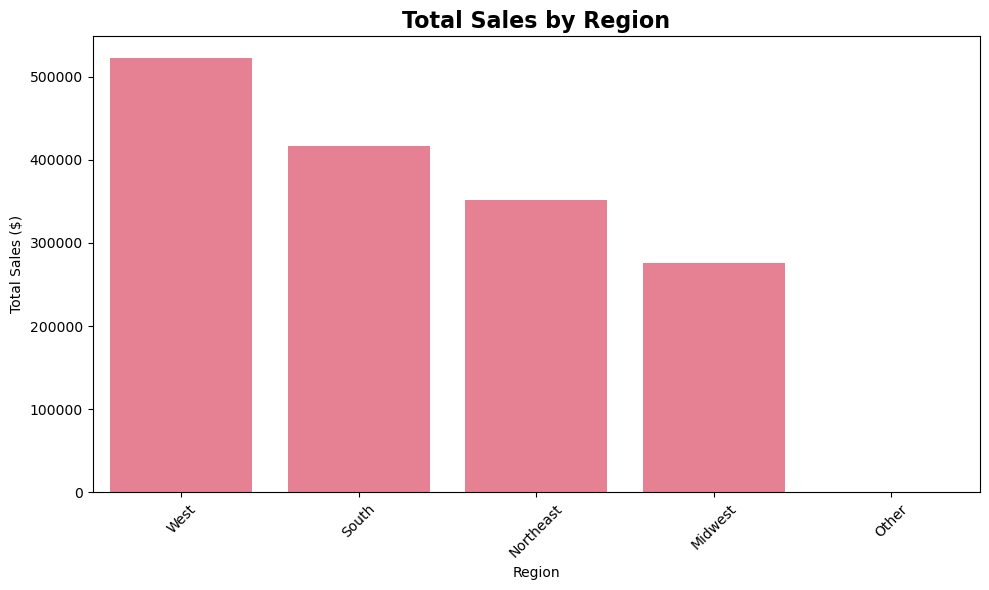

In [ ]:
#Sales by Region
plt.figure(figsize=(10,6))
sales_region = df_clean.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_region.index, y=sales_region.values)
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('outputs/sales_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

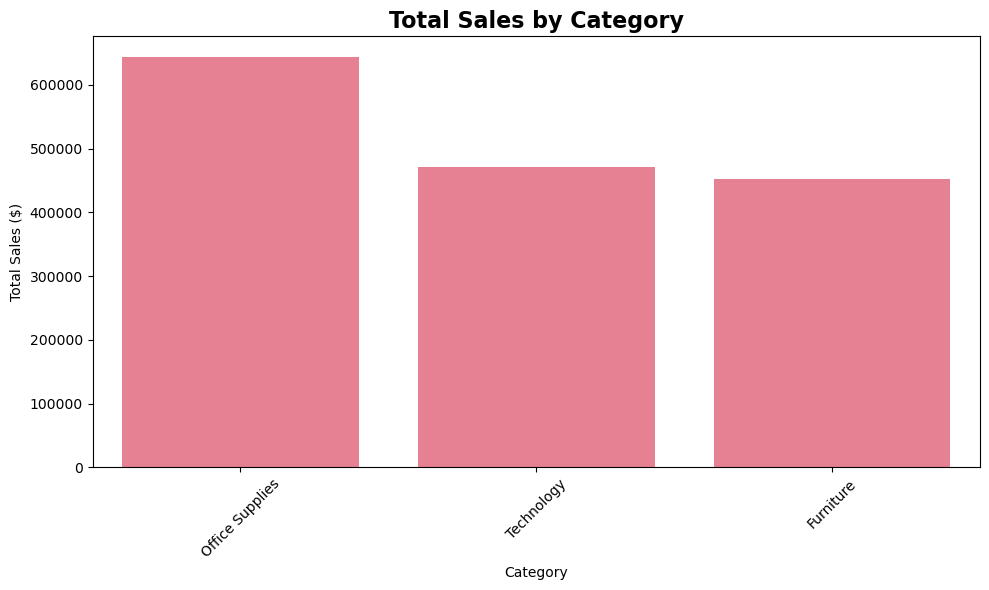

In [ ]:
# Sales by Category 
plt.figure(figsize=(10,6))
sales_cat = df_clean.groupby('Category')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=sales_cat.index, y=sales_cat.values)
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Total Sales ($)')
plt.tight_layout()
plt.savefig('outputs/sales_by_category.png', dpi=300, bbox_inches='tight')
plt.show()


In [13]:
# Make a copy with real datetime for time-series
df_ts = df.copy()
df_ts['Order_Date'] = pd.to_datetime(df_ts['Order Date'], format='mixed')



C:\Users\hp\AppData\Local\Temp\ipykernel_11560\3969022484.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_ts.resample('M', on='Order_Date')['Sales'].sum().reset_index()


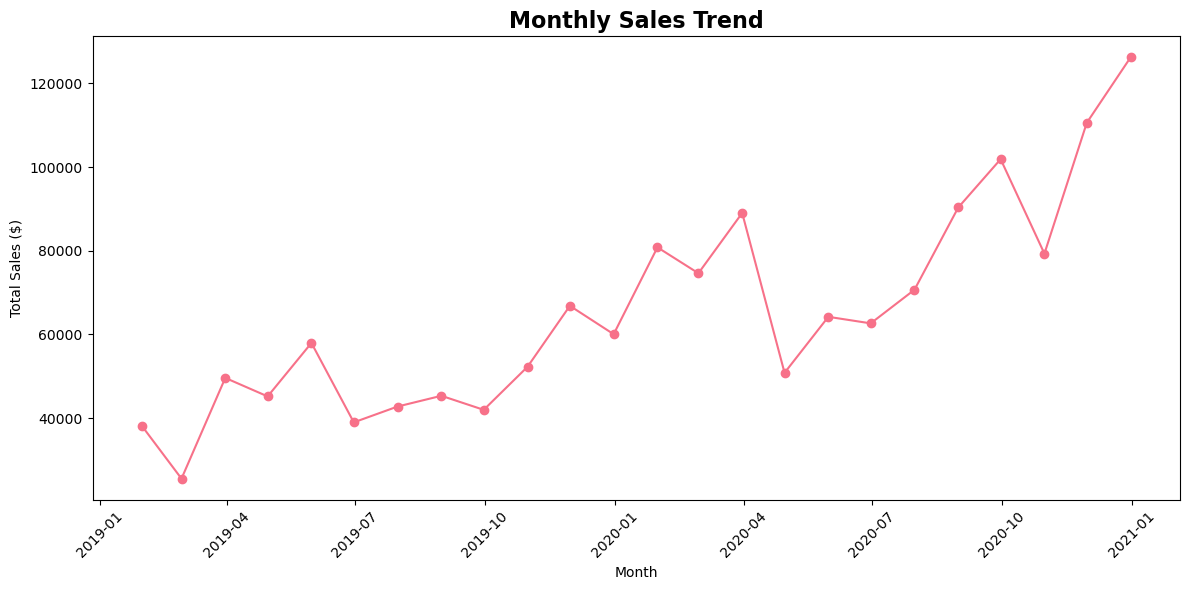

In [14]:
# Monthly sales trend
monthly_sales = df_ts.resample('M', on='Order_Date')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['Order_Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/monthly_sales_trend.png', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')


# Daily demand per product
daily_demand = (
    df.groupby(['Product ID', 'Order Date'])['Quantity']
      .sum()
      .reset_index()
      .rename(columns={'Order Date': 'ds', 'Quantity': 'demand'})
)

# Average daily demand per product
avg_demand = (
    daily_demand.groupby('Product ID')['demand']
    .mean()
    .reset_index()
    .rename(columns={'demand': 'avg_daily_demand'})
)

# Latest stock information per product
stock_cols = ['Product ID', 'Current_Stock', 'Reorder_Level', 'Lead_Time_Days']
stock_info = df[stock_cols].drop_duplicates('Product ID')


inv = stock_info.merge(avg_demand, on='Product ID', how='left')

# Handle products with no demand
inv['avg_daily_demand'] = inv['avg_daily_demand'].fillna(0.0)

# Estimate days until stock reaches zero
inv['days_to_zero'] = np.where(
    inv['avg_daily_demand'] > 0,
    inv['Current_Stock'] / inv['avg_daily_demand'],
    np.inf
)

#  Predicted stockout date
today = pd.Timestamp.today().normalize()
inv['predicted_stockout_date'] = np.where(
    np.isfinite(inv['days_to_zero']),
    today + pd.to_timedelta(inv['days_to_zero'], unit='D'),
    pd.NaT
)

# Stockout risk flag
alert_buffer_days = 7

inv['stockout_risk'] = np.where(
    (inv['Current_Stock'] <= inv['Reorder_Level']) |
    (
        np.isfinite(inv['days_to_zero']) &
        (inv['days_to_zero'] <= inv['Lead_Time_Days'] + alert_buffer_days)
    ),
    1, 0
)

# Products with risk of stockout
stockout_alerts = inv[inv['stockout_risk'] == 1].copy()
stockout_alerts.head()


,Product ID,Current_Stock,Reorder_Level,Lead_Time_Days,avg_daily_demand,days_to_zero,predicted_stockout_date,stockout_risk
6,FUR-TA-10000617,70,23,8,4.666667,15.000000,1765843200000000000,1
110,OFF-ST-10004340,64,21,8,4.750000,13.473684,1765711326315789472,1
149,OFF-ST-10000036,54,18,8,3.750000,14.400000,1765791360000000000,1
527,OFF-LA-10002195,53,17,9,5.750000,9.217391,1765343582608695649,1
546,OFF-PA-10003591,144,48,9,9.000000,16.000000,1765929600000000000,1


In [20]:
stockout_alerts.to_csv('outputs/model1_stockout_alerts.csv', index=False)
inv.to_csv('outputs/model1_inventory_summary.csv', index=False)


C:\Users\hp\AppData\Local\Temp\ipykernel_11560\3551885922.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


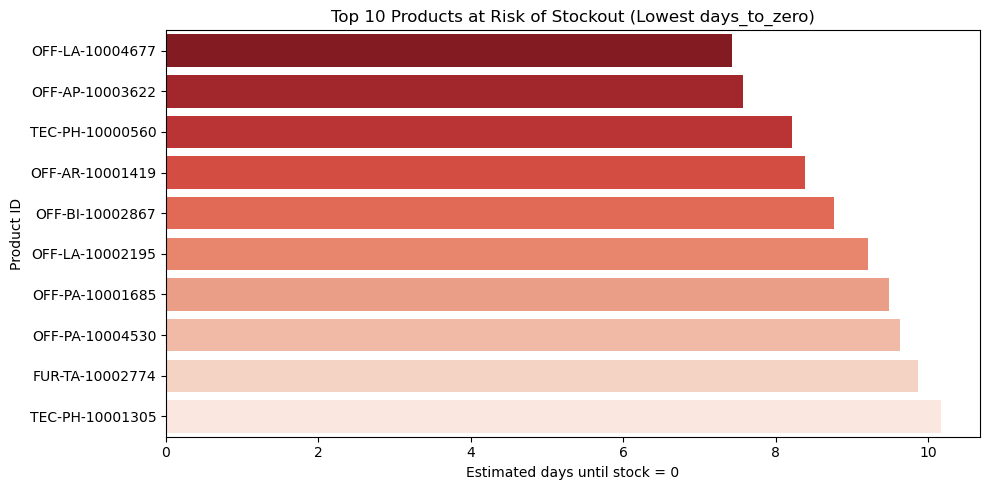

In [23]:
# --- Plot 1: Top 10 products by days_to_zero (lowest first) ---
top_risk = (
    inv[inv['stockout_risk'] == 1]
    .sort_values('days_to_zero')
    .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_risk,
    x='days_to_zero',
    y='Product ID',
    orient='h',
    palette='Reds_r'
)
plt.xlabel('Estimated days until stock = 0')
plt.ylabel('Product ID')
plt.title('Top 10 Products at Risk of Stockout (Lowest days_to_zero)')
plt.tight_layout()
plt.show()


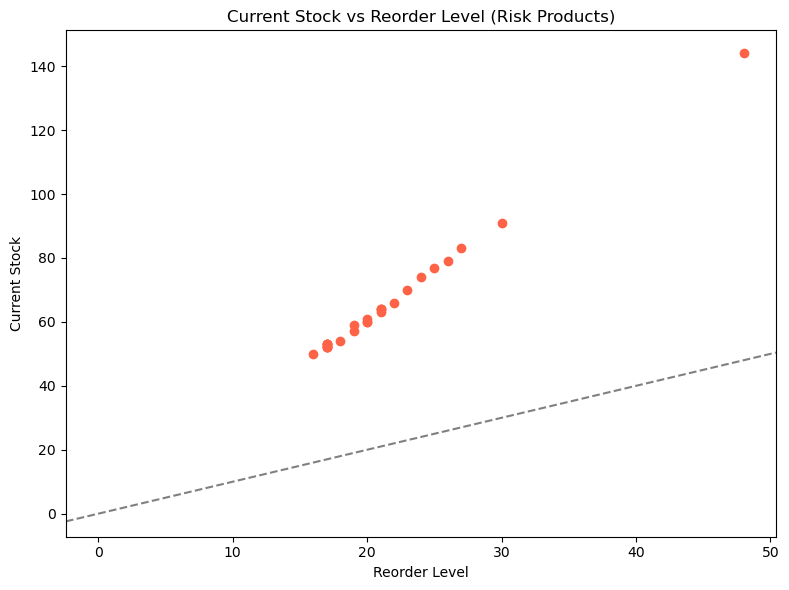

In [25]:
# --- Plot 2: Current stock vs reorder level for risky products ---

plt.figure(figsize=(8, 6))
risk = inv[inv['stockout_risk'] == 1]

plt.scatter(risk['Reorder_Level'], risk['Current_Stock'], c='tomato')
plt.axline((0, 0), (1, 1), color='gray', linestyle='--')  # line where stock = reorder
plt.xlabel('Reorder Level')
plt.ylabel('Current Stock')
plt.title('Current Stock vs Reorder Level (Risk Products)')
plt.tight_layout()
plt.show()


In [ ]:
#HIGH RETURN RATE DETECTION 

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True, errors='coerce')

# 1) Return flag
df['is_return'] = (df['Returns'] > 0).astype(int)

# 2) Return rate by PRODUCT
prod_ret = (
    df.groupby('Product ID')
      .agg(
          total_orders=('Order ID', 'nunique'),
          total_returns=('is_return', 'sum')
      )
      .reset_index()
)

prod_ret['return_rate'] = np.where(
    prod_ret['total_orders'] > 0,
    prod_ret['total_returns'] / prod_ret['total_orders'],
    0.0
)

# 3) Return rate by CITY
city_ret = (
    df.groupby('City')
      .agg(
          total_orders=('Order ID', 'nunique'),
          total_returns=('is_return', 'sum')
      )
      .reset_index()
)

city_ret['return_rate'] = np.where(
    city_ret['total_orders'] > 0,
    city_ret['total_returns'] / city_ret['total_orders'],
    0.0
)

# 4) Category return trend (monthly)
df['YearMonth'] = df['Order Date'].dt.to_period('M').dt.to_timestamp()

cat_ret = (
    df.groupby(['YearMonth', 'Category'])
      .agg(
          total_orders=('Order ID', 'nunique'),
          total_returns=('is_return', 'sum')
      )
      .reset_index()
)

cat_ret['return_rate'] = np.where(
    cat_ret['total_orders'] > 0,
    cat_ret['total_returns'] / cat_ret['total_orders'],
    0.0
)

# Save for Power BI
prod_ret.to_csv('outputs/model2_product_return_rates.csv', index=False)
city_ret.to_csv('outputs/model2_city_return_rates.csv', index=False)
cat_ret.to_csv('outputs/model2_category_return_trend.csv', index=False)


C:\Users\hp\AppData\Local\Temp\ipykernel_11560\4214121255.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


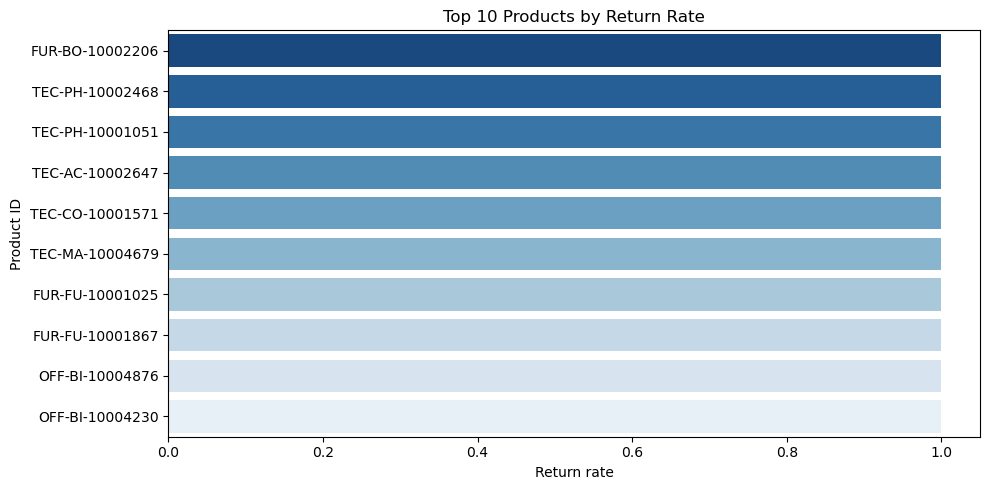

In [ ]:
#   Top 10 products by return rate 
top_prod_returns = (
    prod_ret.sort_values('return_rate', ascending=False)
            .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_prod_returns,
    x='return_rate',
    y='Product ID',
    orient='h',
    palette='Blues_r'
)
plt.xlabel('Return rate')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Return Rate')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11560\3468103650.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


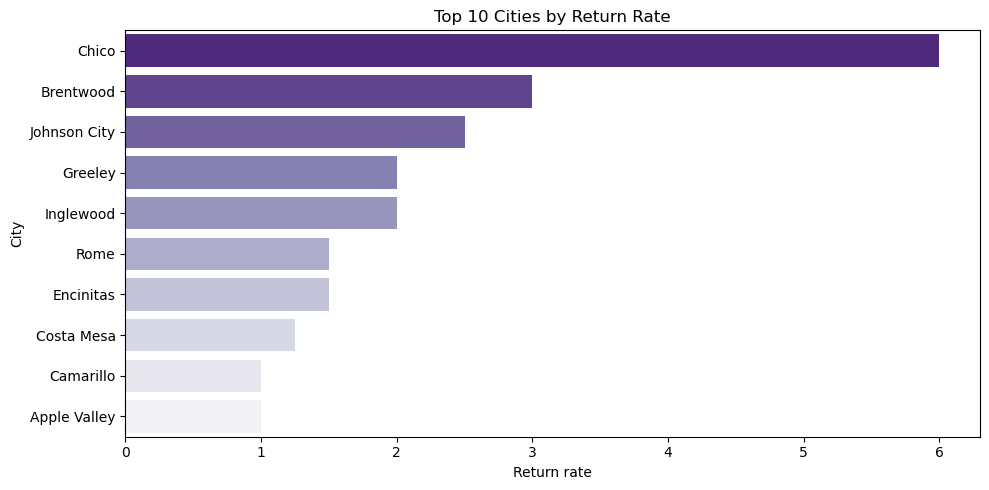

In [ ]:
#   Top 10 cities by return rate 
top_city_returns = (
    city_ret.sort_values('return_rate', ascending=False)
            .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_city_returns,
    x='return_rate',
    y='City',
    orient='h',
    palette='Purples_r'
)
plt.xlabel('Return rate')
plt.ylabel('City')
plt.title('Top 10 Cities by Return Rate')
plt.tight_layout()
plt.show()


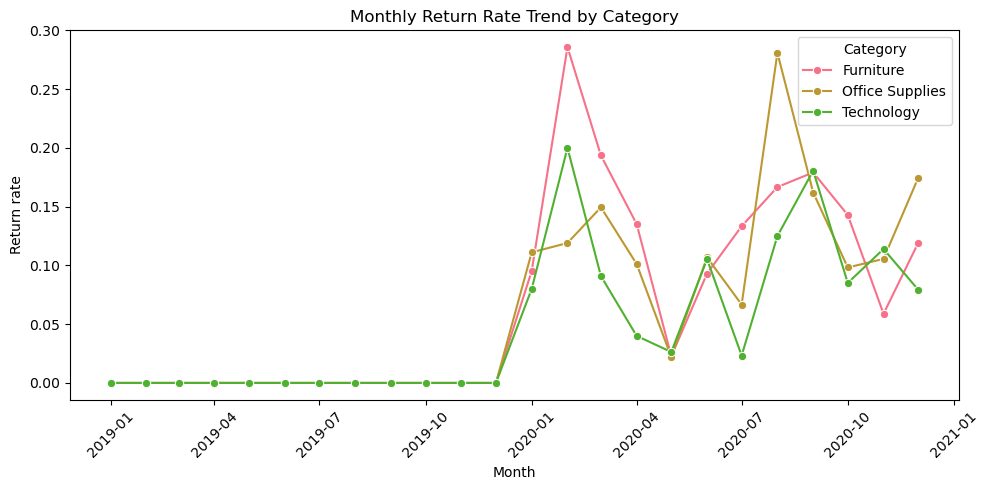

In [ ]:
#  Monthly return rate trend by category 

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=cat_ret,
    x='YearMonth',
    y='return_rate',
    hue='Category',
    marker='o'
)
plt.xlabel('Month')
plt.ylabel('Return rate')
plt.title('Monthly Return Rate Trend by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# PRODUCT PROFITABILITY

# 1) Aggregate by product
prod_profit = (
    df.groupby(['Product ID', 'Product Name'])
      .agg(
          total_sales=('Sales', 'sum'),
          total_profit=('Profit', 'sum'),
          total_quantity=('Quantity', 'sum')
      )
      .reset_index()
)

# 2) Profit margin
prod_profit['profit_margin'] = np.where(
    prod_profit['total_sales'] != 0,
    prod_profit['total_profit'] / prod_profit['total_sales'],
    0.0
)

# 3) Best-selling products
best_sellers = prod_profit.sort_values('total_sales', ascending=False).head(20)

# 4) Loss-making products
loss_makers = prod_profit[prod_profit['total_profit'] < 0]

# 5) High revenue, low margin
sales_median = prod_profit['total_sales'].median()

high_rev_low_margin = prod_profit[
    (prod_profit['total_sales'] > sales_median) &
    (prod_profit['profit_margin'] < 0.10)   # 10% margin threshold
]

# Save for Power BI
prod_profit.to_csv('outputs/model3_product_profitability.csv', index=False)
best_sellers.to_csv('outputs/model3_best_sellers.csv', index=False)
loss_makers.to_csv('outputs/model3_loss_makers.csv', index=False)
high_rev_low_margin.to_csv('outputs/model3_high_rev_low_margin.csv', index=False)

prod_profit.head()


,Product ID,Product Name,total_sales,total_profit,total_quantity,profit_margin
0,FUR-BO-10000112,"Bush Birmingham Collection Bookcase, Dark Cherry",843.1740,-117.8820,9,-0.139807
1,FUR-BO-10000330,"Sauder Camden County Barrister Bookcase, Plank...",276.9600,33.8744,2,0.122308
2,FUR-BO-10000362,Sauder Inglewood Library Bookcases,136.7840,5.1294,1,0.037500
3,FUR-BO-10000468,O'Sullivan 2-Shelf Heavy-Duty Bookcases,722.0660,-156.4276,13,-0.216639
4,FUR-BO-10000780,O'Sullivan Plantations 2-Door Library in Landv...,2709.8968,-562.7440,19,-0.207663


C:\Users\hp\AppData\Local\Temp\ipykernel_11560\3207955561.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


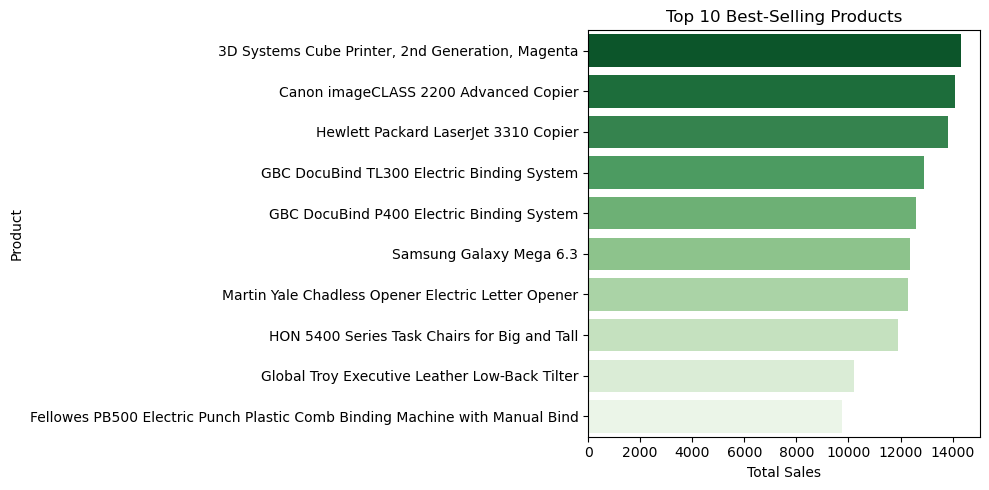

In [ ]:
# Plot 1 - Top 10 best-selling product

top_sales = (
    prod_profit.sort_values('total_sales', ascending=False)
               .head(10)
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_sales,
    x='total_sales',
    y='Product Name',
    orient='h',
    palette='Greens_r'
)
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products')
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_11560\880556591.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


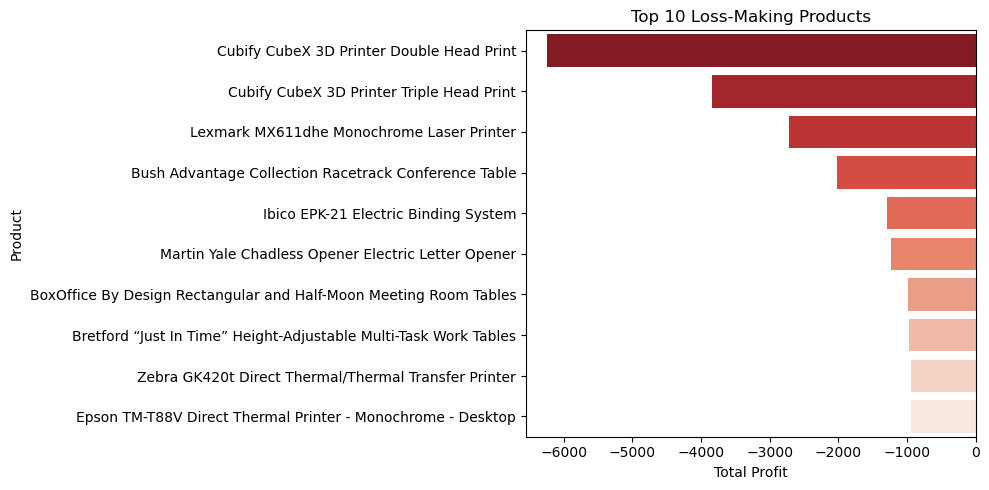

In [30]:

# --- MODEL 3: Plot 2 - Top 10 loss-making products (by total_profit) ---

top_losses = (
    loss_makers.sort_values('total_profit')
               .head(10)  # most negative first
)

plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_losses,
    x='total_profit',
    y='Product Name',
    orient='h',
    palette='Reds_r'
)
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.title('Top 10 Loss-Making Products')
plt.tight_layout()
plt.show()


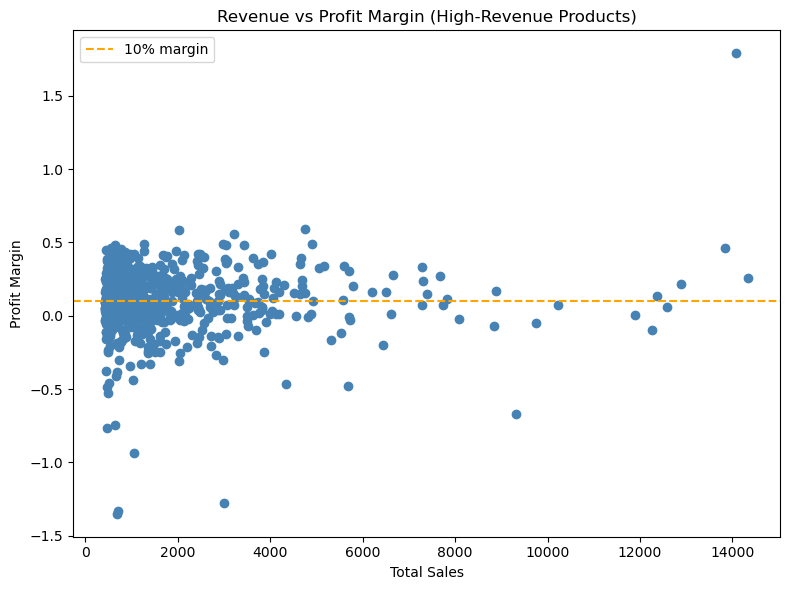

In [31]:
# --- MODEL 3: Plot 3 - Revenue vs Profit Margin (high-revenue products) ---

high_rev = prod_profit[prod_profit['total_sales'] > prod_profit['total_sales'].median()]

plt.figure(figsize=(8, 6))
plt.scatter(high_rev['total_sales'], high_rev['profit_margin'], c='steelblue')
plt.xlabel('Total Sales')
plt.ylabel('Profit Margin')
plt.title('Revenue vs Profit Margin (High-Revenue Products)')
plt.axhline(0.10, color='orange', linestyle='--', label='10% margin')
plt.legend()
plt.tight_layout()
plt.show()
